# <span style="color:orange">**Storms Data Preparation**</span>

### Notebook to explore and prepare the `Storms Dataset` provided by the competition host.
- Create 3 categories of events : `light`, `moderate` and `severe`.
- Analyze keywords in events narratives.
- Create `df_storms`, a dataframe containing one line per fips code and per hour with columns relating to weather events.
- Export `df_storms` as a CSV.

### <u>Note:</u> in this version, only events with `END_DATE_TIME >= 2023-11-01` are kept (for faster inference).
Process all data from 2014 to 2023 takes ~2 hours.

___
___
# **Librairies & Utils**

In [1]:
from utility_script_dynamic_rythms import *

___
___
# **Open Storms data**
<span style="color:green;">**Documentation to help understand each column:**</span> https://www.ncei.noaa.gov/pub/data/swdi/stormevents/csvfiles/Storm-Data-Bulk-csv-Format.pdf

<u>**EAGLEI columns used in my work:**</u>
- <span style="color:#c54f4d;">**BEGIN_YEARMONTH**</span> (information already included in column "BEGIN_DATE_TIME")
- <span style="color:#c54f4d;">**BEGIN_DAY**</span> (information already included in column "BEGIN_DATE_TIME")
- <span style="color:#c54f4d;">**BEGIN_TIME**</span> (information already included in column "BEGIN_DATE_TIME")
- <span style="color:#c54f4d;">**END_YEARMONTH**</span> (information already included in column "END_DATE_TIME")
- <span style="color:#c54f4d;">**END_DAY**</span> (information already included in column "END_DATE_TIME")
- <span style="color:#c54f4d;">**END_TIME**</span> (information already included in column "END_DATE_TIME")
- <span style="color:#42D674;">**EPISODE_ID**</span>
- <span style="color:#42D674;">**EVENT_ID**</span>
- <span style="color:#42D674;">**STATE**</span>
- <span style="color:#42D674;">**STATE_FIPS**</span>
- <span style="color:#c54f4d;">**YEAR**</span> (information already included in column "BEGIN_DATE_TIME")
- <span style="color:#c54f4d;">**MONTH_NAME**</span> (useless for this work)
- <span style="color:#42D674;">**EVENT_TYPE**</span>
- <span style="color:#c54f4d;">**CZ_TYPE**</span> (useless for this work)
- <span style="color:#42D674;">**CZ_FIPS**</span>
- <span style="color:#42D674;">**CZ_NAME**</span>
- <span style="color:#c54f4d;">**WFO**</span> (useless for this work)
- <span style="color:#42D674;">**BEGIN_DATE_TIME**</span>
- <span style="color:#42D674;">**CZ_TIMEZONE**</span>
- <span style="color:#42D674;">**END_DATE_TIME**</span>
- <span style="color:#c54f4d;">**INJURIES_DIRECT**</span> (useless information for forecasting because it will be available too late)
- <span style="color:#c54f4d;">**INJURIES_INDIRECT**</span> (useless information for forecasting because it will be available too late)
- <span style="color:#c54f4d;">**DEATHS_DIRECT**</span> (useless information for forecasting because it will be available too late)
- <span style="color:#c54f4d;">**DEATHS_INDIRECT**</span> (useless information for forecasting because it will be available too late)
- <span style="color:#42D674;">**DAMAGE_PROPERTY**</span> (useful information but won't be used as feature since it can't be available on time)
- <span style="color:#42D674;">**DAMAGE_CROPS**</span> (useful information but won't be used as feature since it can't be available on time)
- <span style="color:#c54f4d;">**SOURCE**</span> (any source is fine, we don't need the detail)
- <span style="color:#42D674;">**MAGNITUDE**</span>
- <span style="color:#c54f4d;">**MAGNITUDE_TYPE**</span> (we will group by similar events to manage types differences)
- <span style="color:#c54f4d;">**FLOOD_CAUSE**</span> (not used)
- <span style="color:#c54f4d;">**CATEGORY**</span> (Unknown column according to NCEI)
- <span style="color:#c54f4d;">**TOR_F_SCALE**</span> (not used)
- <span style="color:#c54f4d;">**TOR_LENGTH**</span> (This is a level of precision we don't need)
- <span style="color:#c54f4d;">**TOR_WIDTH**</span> (This is a level of precision we don't need)
- <span style="color:#c54f4d;">**TOR_OTHER_WFO**</span> (This is a level of precision we don't need)
- <span style="color:#c54f4d;">**TOR_OTHER_CZ_STATE**</span> (We will discover this info through data itself by following the tornado expansion)
- <span style="color:#c54f4d;">**TOR_OTHER_CZ_FIPS**</span>(We will discover this info through data itself by following the tornado expansion)
- <span style="color:#c54f4d;">**TOR_OTHER_CZ_NAME**</span> (We will discover this info through data itself by following the tornado expansion)
- <span style="color:#c54f4d;">**BEGIN_RANGE**</span> (This is a level of precision we don't need)
- <span style="color:#c54f4d;">**BEGIN_AZIMUTH**</span> (This is a level of precision we don't need)
- <span style="color:#c54f4d;">**BEGIN_LOCATION**</span> (This is a level of precision we don't need)
- <span style="color:#c54f4d;">**END_RANGE**</span> (This is a level of precision we don't need)
- <span style="color:#c54f4d;">**END_AZIMUTH**</span> (This is a level of precision we don't need)
- <span style="color:#c54f4d;">**END_LOCATION**</span> (This is a level of precision we don't need)
- <span style="color:#c54f4d;">**BEGIN_LAT**</span> (not used)
- <span style="color:#c54f4d;">**BEGIN_LON**</span> (not used)
- <span style="color:#c54f4d;">**END_LAT**</span> (not used)
- <span style="color:#c54f4d;">**END_LON**</span> (not used)
- <span style="color:#c54f4d;">**EPISODE_NARRATIVE**</span> (We only look at event narrative, since it's more likely to be available sooner that episode narrative)
- <span style="color:#42D674;">**EVENT_NARRATIVE**</span>
- <span style="color:#c54f4d;">**DATA_SOURCE**</span> (NaN column)

In [2]:
%%time

# Useful columns
cols = ['EPISODE_ID', 'EVENT_ID', 'EVENT_TYPE',
        'BEGIN_DATE_TIME', 'END_DATE_TIME',
        'STATE', 'CZ_NAME',
        'STATE_FIPS', 'CZ_FIPS', 
        'DAMAGE_PROPERTY', 'DAMAGE_CROPS',
        'MAGNITUDE', 'EVENT_NARRATIVE']

# Open CSV
df_storms = pd.read_csv(filedir + "/NOAA_StormEvents/StormEvents_2014_2024.csv", usecols=cols)

# Arrange columns order
df_storms = df_storms[cols]

# Convert some columns to datetime
for k in ['BEGIN_DATE_TIME', 'END_DATE_TIME']:
    df_storms[k] = pd.to_datetime(df_storms[k])

# Convert damage columns to integers
for k in ["DAMAGE_PROPERTY", "DAMAGE_CROPS"]:
    df_storms[k] = df_storms[k].astype(str).apply(convert_damage).astype(int)

# Create fips_code column
fips_col = df_storms.apply(lambda row : int(str(row['STATE_FIPS']).zfill(2) + str(row['CZ_FIPS']).zfill(3)),axis=1)
df_storms.insert(9, "fips", fips_col)

# Put text in lowercases
for k in ['EPISODE_NARRATIVE', 'EVENT_NARRATIVE']:
    if k in df_storms :
        df_storms[k] = df_storms[k].str.lower()

# Sort values
df_storms = df_storms.sort_values(by = ['EPISODE_ID',
                                        'BEGIN_DATE_TIME', 'END_DATE_TIME',
                                        'EVENT_ID', 'fips']).reset_index(drop=True)

# Show
print(df_storms.shape)
df_storms.head()

(691434, 14)
CPU times: user 1min 18s, sys: 1.75 s, total: 1min 19s
Wall time: 1min 26s


,EPISODE_ID,EVENT_ID,EVENT_TYPE,BEGIN_DATE_TIME,END_DATE_TIME,STATE,CZ_NAME,STATE_FIPS,CZ_FIPS,fips,DAMAGE_PROPERTY,DAMAGE_CROPS,MAGNITUDE,EVENT_NARRATIVE
0,80464,481903,Winter Weather,2014-01-02 05:00:00,2014-01-03 01:00:00,OHIO,PERRY,39,66,39066,0,0,NaN,NaN
1,80465,481904,Winter Weather,2014-01-02 06:30:00,2014-01-02 08:30:00,WEST VIRGINIA,LOGAN,54,25,54025,50000,0,NaN,NaN
2,80465,481905,Winter Weather,2014-01-02 06:30:00,2014-01-02 08:30:00,WEST VIRGINIA,BOONE,54,26,54026,50000,0,NaN,NaN
3,80465,481906,Winter Weather,2014-01-02 16:00:00,2014-01-03 10:00:00,WEST VIRGINIA,BARBOUR,54,40,54040,0,0,NaN,NaN
4,80465,481907,Winter Weather,2014-01-02 16:00:00,2014-01-03 10:00:00,WEST VIRGINIA,UPSHUR,54,39,54039,0,0,NaN,NaN


___
___
# **Some stats about the events of the storm dataset.**
>The idea of these statistics is to imagine powerful forecasting features for our future model.
### 48 events are listed.
- <span style="color:#42D674;">**Most common:**</span> Thunderstorm Wind, Hail, Flash Flood...
- <span style="color:#c54f4d;">**Rarest     :**</span> Sneakerwave, tsunami ...

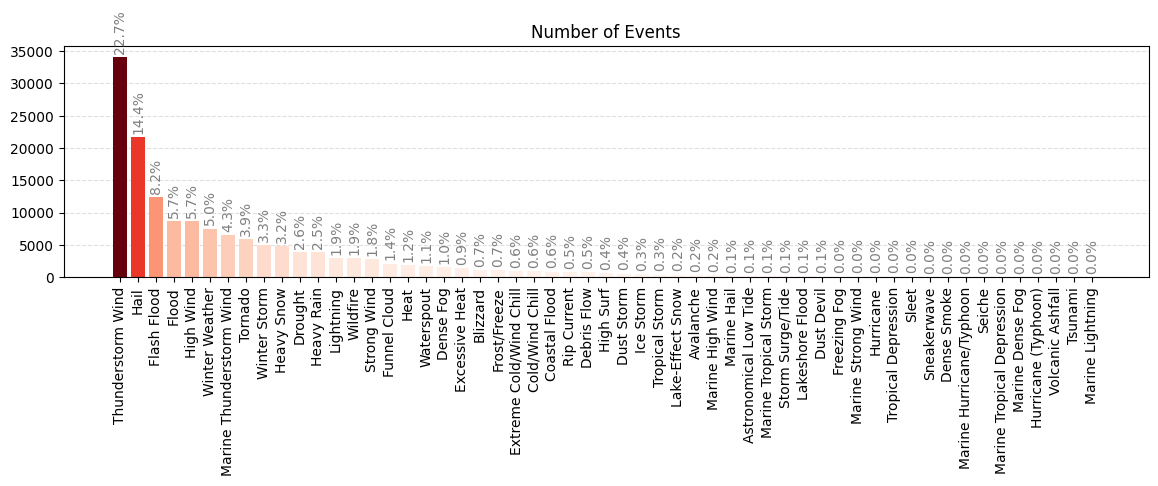

In [3]:
# Compute stats
stats = df_storms.groupby(['EVENT_TYPE']).agg({'EPISODE_ID' : ['nunique'],
                                               'DAMAGE_PROPERTY' : ['sum', 'mean', 'max'],
                                               'DAMAGE_CROPS' : ['sum', 'mean', 'max'],
                                               }).reset_index()
# Flatten columns
stats.columns = ['_'.join(i).rstrip('_') for i in stats.columns.values]

# Plot Episodes by events
plot_bars(stats, col='EPISODE_ID_nunique', title="Number of Events")

### Events with the highest <u>TOTAL</u> damages :
- <span style="color:#c54f4d;">**For properties :**</span> Floods, Hail, Blizzard, Tornado and Strong winds.
- <span style="color:#42D674;">**For crops      :**</span> Floods and Hail.

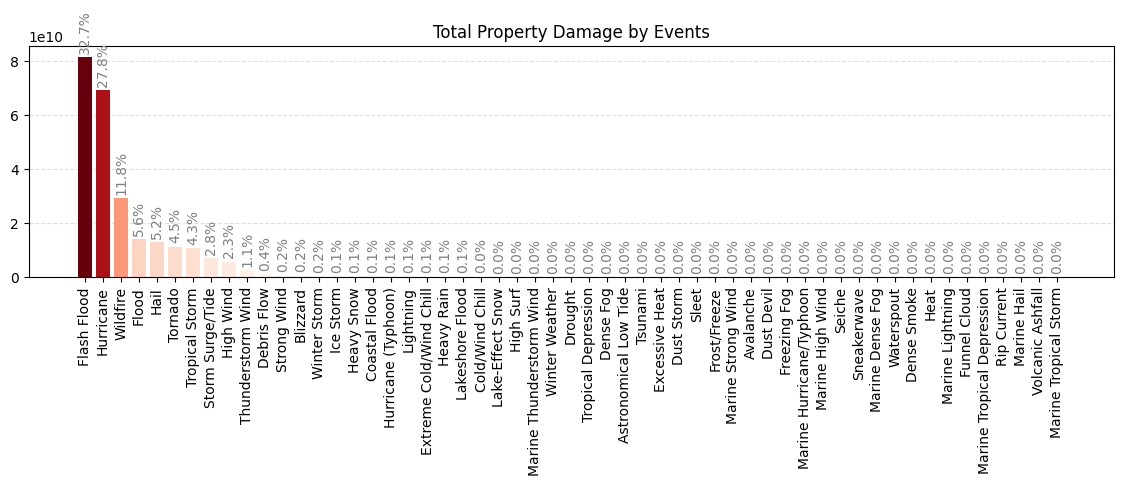

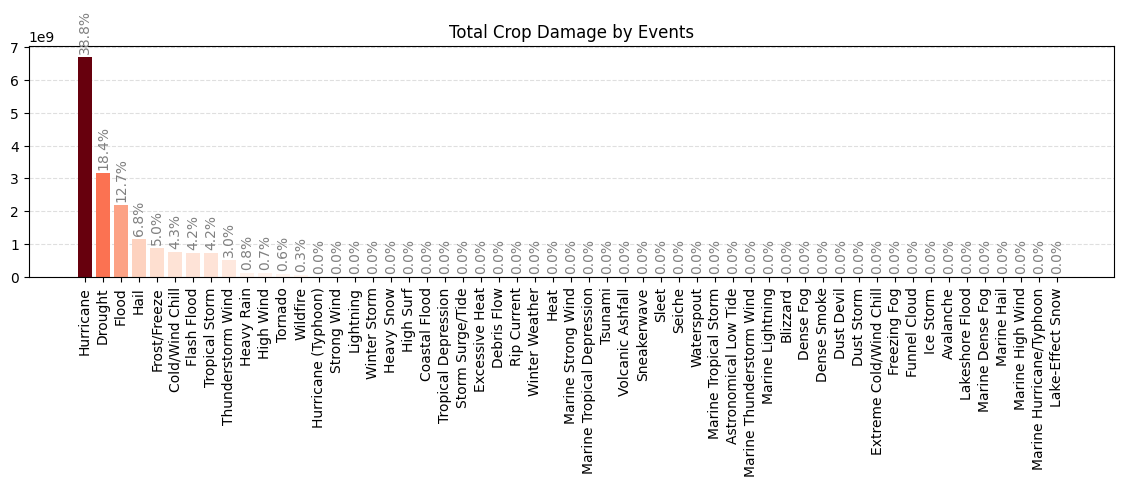

In [4]:
plot_bars(stats, col='DAMAGE_PROPERTY_sum', title="Total Property Damage by Events")
plot_bars(stats, col='DAMAGE_CROPS_sum', title="Total Crop Damage by Events")

### Events with the highest <u>AVERAGE</u> damages :
- <span style="color:#c54f4d;">**For both properties and crops :**</span> Hurricane (by far), Blizzard, Storms Surge, Floods, Tornados, Tropical and Ice Storms.

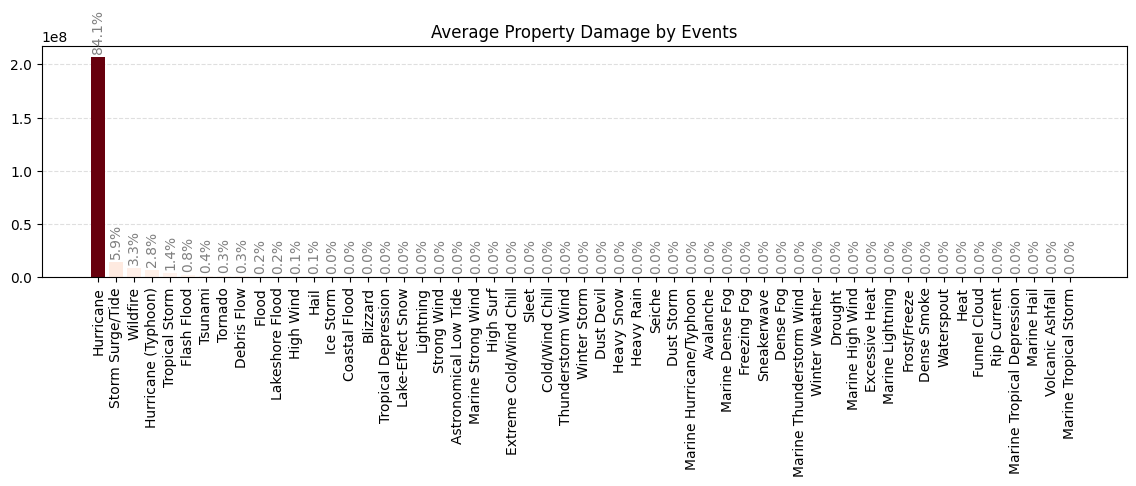

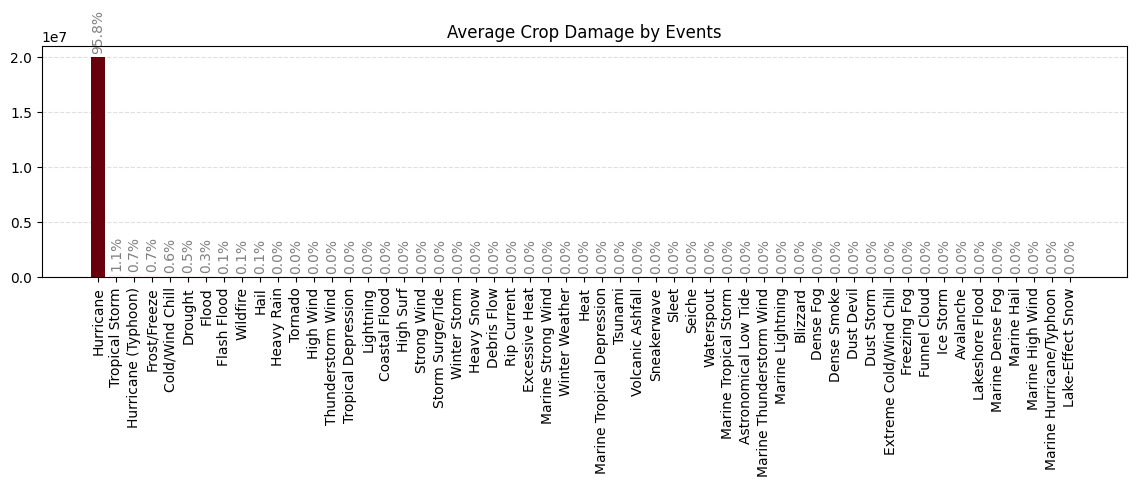

In [5]:
plot_bars(stats, col='DAMAGE_PROPERTY_mean', title="Average Property Damage by Events")
plot_bars(stats, col='DAMAGE_CROPS_mean', title="Average Crop Damage by Events")

### Based on previous graphs, let's group weather events into 3 categories:
- <span style="color:red;">**Group n°1 :**</span> High Total <u>or</u> Average Damage.
- <span style="color:orange;">**Group n°2 :**</span> Moderate Total <u>or</u> Average Damage.
- <span style="color:green;">**Group n°3 :**</span> Low Total <u>and</u> Average Damage.

#### <span style="color:red;">**Group n°1 :**</span> High Total <u>or</u> Average Damage.

In [6]:
# Group n°1 : Severe events
conditions = [(stats['DAMAGE_PROPERTY_mean'] >= 20000),
              (stats['DAMAGE_PROPERTY_max'] >= 1e6),
              (stats['DAMAGE_CROPS_mean'] >= 20000),
              (stats['DAMAGE_CROPS_max'] >= 1e6)]

# Create mask for rows meeting at least 2 conditions
mask = (sum(conditions) >= 2)

# Filter events
severe_event_types = set(stats[mask]['EVENT_TYPE'].unique())
print(f"Group n°1 (Severe Events) : {len(severe_event_types)}/48.")
print(severe_event_types)

Group n°1 (Severe Events) : 30/48.
{'Ice Storm', 'High Wind', 'Lakeshore Flood', 'Coastal Flood', 'Strong Wind', 'Debris Flow', 'High Surf', 'Hail', 'Tropical Storm', 'Frost/Freeze', 'Blizzard', 'Flood', 'Heavy Snow', 'Heavy Rain', 'Thunderstorm Wind', 'Tsunami', 'Flash Flood', 'Storm Surge/Tide', 'Hurricane (Typhoon)', 'Winter Storm', 'Drought', 'Cold/Wind Chill', 'Lake-Effect Snow', 'Hurricane', 'Lightning', 'Tropical Depression', 'Marine Strong Wind', 'Tornado', 'Astronomical Low Tide', 'Wildfire'}


#### <span style="color:orange;">**Group n°2 :**</span> Moderate Total <u>or</u> Average Damage.

In [7]:
# Group n°2 : Medium
conditions = [(stats['DAMAGE_PROPERTY_mean'] > 5000),
              (stats['DAMAGE_PROPERTY_max'] > 5e5),
              (stats['DAMAGE_CROPS_mean'] > 5000),
              (stats['DAMAGE_CROPS_max'] > 5e5)]

# Create mask for rows meeting at least 1 condition
mask = (sum(conditions) >= 1) & (~stats['EVENT_TYPE'].isin(severe_event_types))

# Filter events
moderate_event_types = set(stats[mask]['EVENT_TYPE'].unique())
print(f"Group n°2 (Moderate Events) : {len(moderate_event_types)}/48.")
print(moderate_event_types)

Group n°2 (Moderate Events) : 10/48.
{'Excessive Heat', 'Dense Fog', 'Marine Hurricane/Typhoon', 'Marine Thunderstorm Wind', 'Winter Weather', 'Dust Devil', 'Sleet', 'Extreme Cold/Wind Chill', 'Dust Storm', 'Seiche'}


#### <span style="color:green;">**Group n°3 :**</span> Low Total <u>and</u> Average Damage.

In [8]:
# Group n°3 : Light
mask = (~stats['EVENT_TYPE'].isin(severe_event_types)) & (~stats['EVENT_TYPE'].isin(moderate_event_types))

# Filter events
light_event_types = set(stats[mask]['EVENT_TYPE'].unique())
print(f"Group n°3 (light Events) : {len(light_event_types)}/48.")
print(light_event_types)

Group n°3 (light Events) : 15/48.
{'Marine Dense Fog', 'Heat', 'Funnel Cloud', 'Marine Hail', 'Volcanic Ashfall', 'Marine High Wind', 'Marine Tropical Storm', 'Rip Current', 'Waterspout', 'Freezing Fog', 'Avalanche', 'Dense Smoke', 'Marine Lightning', 'Marine Tropical Depression', 'Sneakerwave'}


#### Create a column to identify these groups & plot stats about them

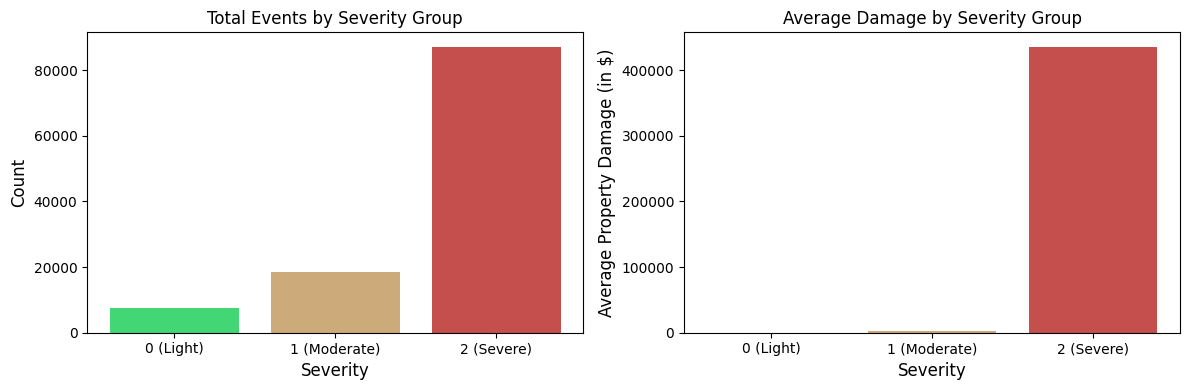

In [9]:
# Create a mapping
severity_mapping = {}
for event_type in severe_event_types   : severity_mapping[event_type] = 2 # Severe
for event_type in moderate_event_types : severity_mapping[event_type] = 1 # Moderate
for event_type in light_event_types    : severity_mapping[event_type] = 0 # Light

# Apply mapping
df_storms['Event_Severity'] = df_storms['EVENT_TYPE'].map(severity_mapping)

# Plot information about the severity groups we jsut created
plot_stats_about_severity_groups(df_storms)

#### Create a column `'EVENT_TYPE_simplified'` by grouping similar events (e.g. all types of winds)

In [10]:
# Create mapping
group_mapping = {'Flood': ['Flash Flood', 'Flood', 'Debris Flow', 'Coastal Flood'],
                 'Wind' : ['Strong Wind', 'High Wind', 'Marine Strong Wind', 'Thunderstorm Wind', 'Tornado'],
                 'Storm': ['Tropical Storm', 'Ice Storm', 'Lightning', 'Winter Storm', 'Hurricane', 'Hurricane (Typhoon)'],
                 'Fire' : ['Wildfire'],
                }
mapping = {}
for group_name, list_of_events in group_mapping.items() :
    for event in list_of_events :
        mapping[event] = group_name

# Add other events
for event_type in severe_event_types   :
    if event_type not in mapping : mapping[event_type] = "Other_severe" # Severe
for event_type in moderate_event_types :
    if event_type not in mapping : mapping[event_type] = "Other_moderate" # Moderate
for event_type in light_event_types    :
    if event_type not in mapping : mapping[event_type] = "Other_light" # Light

# Simplify event_type by saving details only for severe events
df_storms['EVENT_TYPE_simplified'] = df_storms['EVENT_TYPE'].map(mapping)

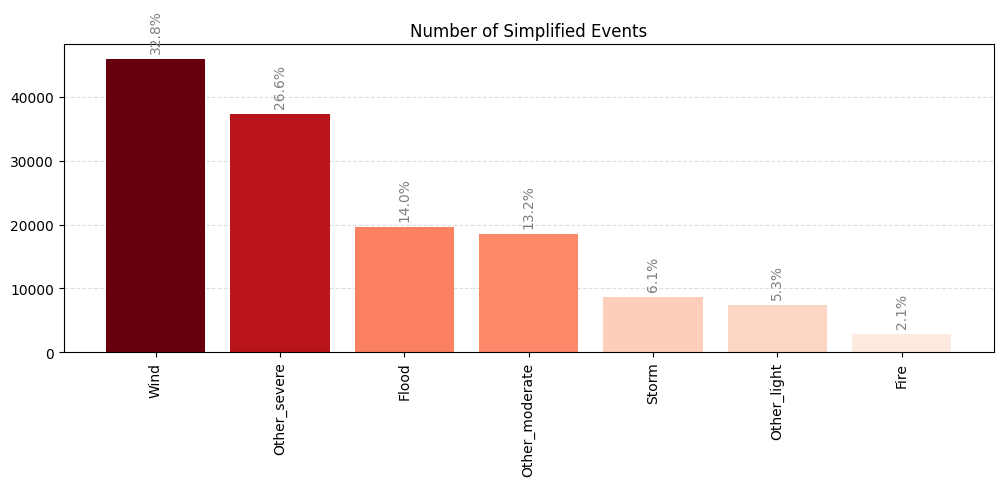

In [11]:
# Compute stats
stats = df_storms.groupby(['EVENT_TYPE_simplified']).agg({'EPISODE_ID' : ['nunique']}).reset_index()
stats.columns = ['_'.join(i).rstrip('_') for i in stats.columns.values]

# Plot Episodes by events
plot_bars(stats, col='EPISODE_ID_nunique', title="Number of Simplified Events", figsize=(12, 4))

___
### **Plot some statistics about Episodes**
- Repartition of Durations
- Numbers of Events by Episode

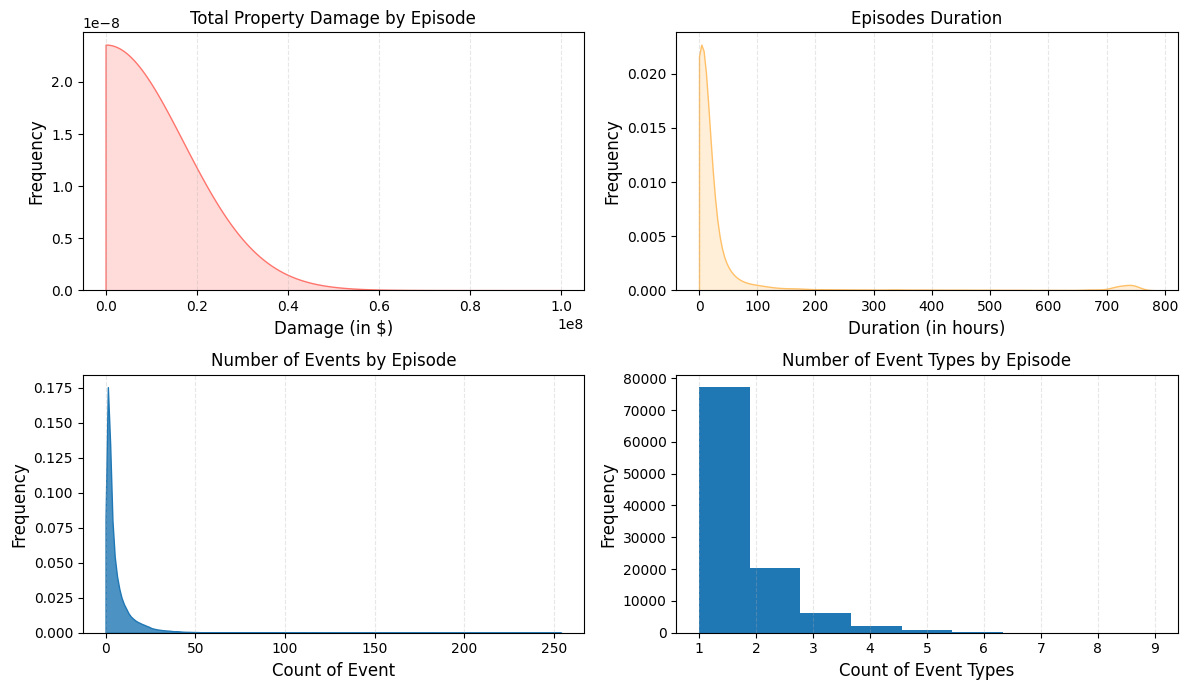

In [12]:
plot_stats_about_episodes(df_storms)

___
___
# **Some stats about episode narratives**
- Most frequent words
- Keywords related to power outages

> The idea is too use narratives as features for our future model (with simple and frequent keywords), even though they might not always be available on time. The underlying idea is that if a report says that some trees were uprooted and felt on power lines, we can tell the model about it. After testing on practice, such features are not the most useful, but they still contain some forecasting power.

In [13]:
# Weather Keywords (We use sets to search faster if a word belong to a list)
Weather_KEYWORDS = {
    
                    'WORDS_wind_and_storm': {'blowing', 'blown', 'cyclone', 'gust', 'gusts', 'hurricane', 'storm', 'storms', 'sustained',
                                             'tempest', 'thunderstorm', 'thunderstorms', 'tornado', 'tornados', 'wind', 'winds'},
                    
                    'WORDS_downed_trees': {'blown', 'branches', 'broken', 'down', 'downed', 'fallen', 'fell',
                                           'limbs', 'snapped', 'tree', 'trees', 'uprooted'},
                                        
                    'WORDS_heavy_damage': {'accident', 'collapse', 'crash', 'damage', 'damaged', 'destruction', 'devastated', 'devastating',
                                           'emergency', 'extreme', 'heavy', 'major', 'numerous', 'several', 'widespread', 'severe', 'strong', 'terrible', 'wreckage'},
                                        
                    'WORDS_wires': {'blackout', 'electrical', 'knocked', 'lines', 'outage',
                                    'poles', 'power', 'transformer', 'wire', 'wires', 'blocked'},
                                        
                    'WORDS_water_and_flood': {'creek', 'flood', 'flooded', 'flooding', 'inundated', 'overflow', 'precipitation',
                                              'rain', 'rainfall', 'river', 'stormwater', 'water', 'waters'},
                                        
                    'WORDS_heat_and_fire': {'arid', 'blaze', 'burning', 'drought', 'dry', 'fire', 'heat', 'hot', 'scorching', 'wildfire'},
                                        
                    'WORDS_snow': {'accumulation', 'accumulations', 'blizzard', 'cold', 'feet', 'freezing', 'ice', 'inches', 'inches.', 'sleet',
                                   'snow', 'snow.', 'snowed', 'snowfall'},
                   
                   }

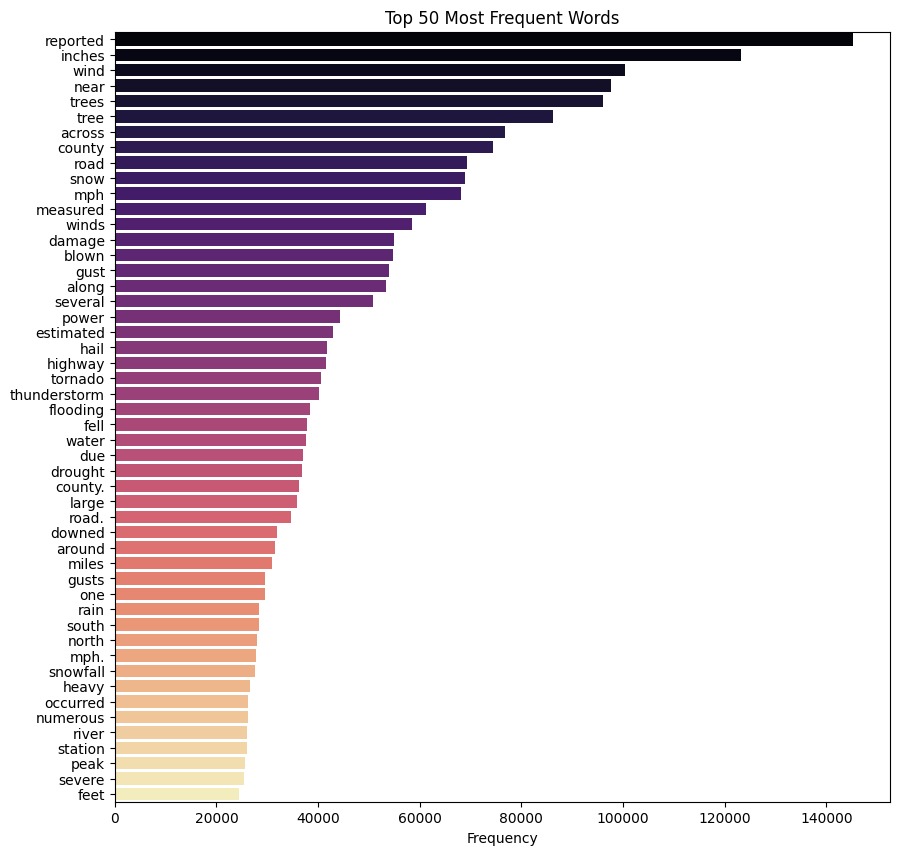

In [14]:
# Compute Counter of words (stopwords not included)
counter = get_word_counter(df_storms, 'EVENT_NARRATIVE')

# Plot 50 most frequent words
plot_most_frequent_words(counter, n_words=50)

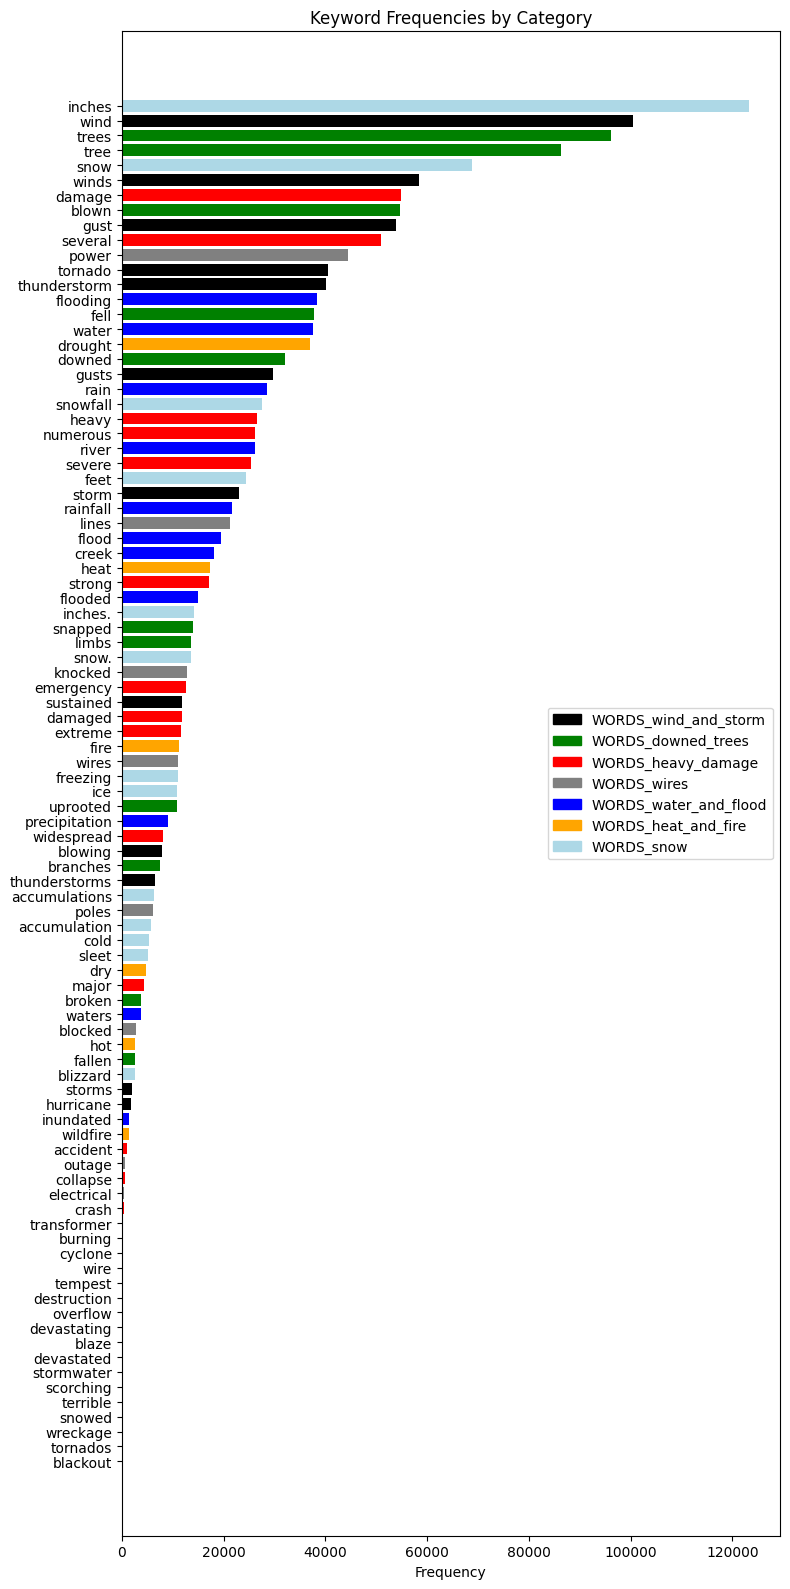

In [15]:
# Plot words frequency by category
plot_words_by_category(counter, categories=Weather_KEYWORDS, figsize=(12, 17))

### **Add columns in df_storms, corresponding to word counts of each category in EVENT_NARRATIVE**

In [16]:
%%time

# Word selection
for list_name, list_of_words in Weather_KEYWORDS.items():
    df_storms[list_name] = df_storms['EVENT_NARRATIVE'].astype(str).apply(lambda text : np.sum([1 if word in list_of_words else 0 for word in text.split()])).fillna(0)

# Show one line
df_storms.head(1)

CPU times: user 1min 2s, sys: 269 ms, total: 1min 2s
Wall time: 1min 2s


,EPISODE_ID,EVENT_ID,EVENT_TYPE,BEGIN_DATE_TIME,END_DATE_TIME,STATE,CZ_NAME,STATE_FIPS,CZ_FIPS,fips,...,EVENT_NARRATIVE,Event_Severity,EVENT_TYPE_simplified,WORDS_wind_and_storm,WORDS_downed_trees,WORDS_heavy_damage,WORDS_wires,WORDS_water_and_flood,WORDS_heat_and_fire,WORDS_snow
0,80464,481903,Winter Weather,2014-01-02 05:00:00,2014-01-03 01:00:00,OHIO,PERRY,39,66,39066,...,NaN,1,Other_moderate,0,0,0,0,0,0,0


___
___
# **Change df_storms format to one line per episode_id and per hour**
- This will help us join the EAGLEI data to storms data.
- Note : df_storms contain 6000 fips codes, which is almost twice the number as in EAGLEI data.

# <span style="color:orange">**Storms Data Preparation**</span>

### Notebook to explore and prepare the `Storms Dataset` provided by the competition host.
- Create 3 categories of events : `light`, `moderate` and `severe`.
- Analyze keywords in events narratives.
- Create `df_storms`, a dataframe containing one line per fips code and per hour with columns relating to weather events.
- Export `df_storms` as a CSV.

### <u>Note:</u> in this version, only events with `END_DATE_TIME >= 2023-11-01` are kept (for faster inference).
Process all data from 2014 to 2023 takes ~2 hours.

In [17]:
# DATE FILTERING FOR FASTER PROCESS TIME.
df_storms = df_storms[df_storms['END_DATE_TIME'] >= '2023-11-01'].reset_index(drop=True)

In [18]:
%%time

# Initialize a df which will have one line by fips and by hour
df_by_fips_and_hour = None

# Loop over all fips
for fips in tqdm(df_storms['fips'].unique()) :

    # Create a temporary df
    df_tmp = df_storms[df_storms['fips'] == fips].sort_values(by =  ['BEGIN_DATE_TIME', 'END_DATE_TIME']).reset_index(drop=True)
    
    # Add one line for every single hour where there has been an event
    df_tmp = add_every_hour_between_periods(df_tmp)
    
    # --------------------------------------------------------------------
    # Df with weather keywords
    dict_agg = {k : ['sum'] for k in Weather_KEYWORDS}
    df_keywords = df_tmp.groupby(['fips', 'date']).agg(dict_agg).reset_index()

    # Flatten column names
    df_keywords.columns = [i[0] for i in df_keywords.columns.values]

    # --------------------------------------------------------------------
    # Df magnitude
    df_magnitude = df_tmp.groupby(['fips', 'date'])['MAGNITUDE'].max().reset_index()

    # --------------------------------------------------------------------
    # Overwrite df_tmp to Compute values (groupby)
    df_tmp = df_tmp.groupby(['fips', 'date', 'EVENT_TYPE_simplified'])['EVENT_ID'].count().reset_index() \
                   .rename(columns = {'EVENT_ID' : "Count"})

    # Pivot
    df_tmp = df_tmp.pivot(index = ['fips', 'date'],
                          columns='EVENT_TYPE_simplified',
                          values=['Count']).reset_index()

    # Flatten column names
    df_tmp.columns = ['_'.join(i).rstrip('_') for i in df_tmp]

    # --------------------------------------------------------------------
    # Merge df_ magnitude with df_tmp
    df_tmp = pd.merge(df_tmp, df_magnitude, how='left', on=['fips', 'date'])

    # Merge weather keywords with df_tmp
    df_tmp = pd.merge(df_tmp, df_keywords, how='left', on=['fips', 'date'])

    # --------------------------------------------------------------------

    # Add df_tmp to the global df
    df_by_fips_and_hour = pd.concat([df_by_fips_and_hour, df_tmp], ignore_index=True)

# Drop duplicates and sort
df_by_fips_and_hour = df_by_fips_and_hour.drop_duplicates().sort_values(by = ['date', 'fips']).reset_index(drop=True)

# Fill NaN
df_by_fips_and_hour.fillna(0, inplace=True)

# Show
print(df_by_fips_and_hour.shape)
df_by_fips_and_hour.head()

100%|██████████| 5421/5421 [12:14<00:00,  7.38it/s]


(2654912, 17)
CPU times: user 10min, sys: 2min 18s, total: 12min 18s
Wall time: 12min 16s


,fips,date,Count_Other_light,Count_Other_moderate,Count_Other_severe,Count_Wind,MAGNITUDE,WORDS_wind_and_storm,WORDS_downed_trees,WORDS_heavy_damage,WORDS_wires,WORDS_water_and_flood,WORDS_heat_and_fire,WORDS_snow,Count_Flood,Count_Storm,Count_Fire
0,1001,2023-11-01,0.0,0.0,1.0,0.0,0.0,0,0,1,0,1,3,0,0.0,0.0,0.0
1,1002,2023-11-01,0.0,0.0,1.0,0.0,0.0,0,0,1,0,1,3,0,0.0,0.0,0.0
2,1003,2023-11-01,0.0,0.0,1.0,0.0,0.0,0,0,1,0,1,3,0,0.0,0.0,0.0
3,1004,2023-11-01,0.0,0.0,1.0,0.0,0.0,0,0,1,0,1,3,0,0.0,0.0,0.0
4,1005,2023-11-01,0.0,0.0,1.0,0.0,0.0,0,0,1,0,1,3,0,0.0,0.0,0.0


In [19]:
# Reduce memory usage by converting column types
df_by_fips_and_hour = reduce_memory_usage(df_by_fips_and_hour)

# Show
print(df_by_fips_and_hour.shape)
df_by_fips_and_hour.head()

BEFORE: Memory usage of dataframe is 344.30 MB
AFTER: Memory usage became:  91.1  MB
(2654912, 17)


,fips,date,Count_Other_light,Count_Other_moderate,Count_Other_severe,Count_Wind,MAGNITUDE,WORDS_wind_and_storm,WORDS_downed_trees,WORDS_heavy_damage,WORDS_wires,WORDS_water_and_flood,WORDS_heat_and_fire,WORDS_snow,Count_Flood,Count_Storm,Count_Fire
0,1001,2023-11-01,0.0,0.0,1.0,0.0,0.0,0,0,1,0,1,3,0,0.0,0.0,0.0
1,1002,2023-11-01,0.0,0.0,1.0,0.0,0.0,0,0,1,0,1,3,0,0.0,0.0,0.0
2,1003,2023-11-01,0.0,0.0,1.0,0.0,0.0,0,0,1,0,1,3,0,0.0,0.0,0.0
3,1004,2023-11-01,0.0,0.0,1.0,0.0,0.0,0,0,1,0,1,3,0,0.0,0.0,0.0
4,1005,2023-11-01,0.0,0.0,1.0,0.0,0.0,0,0,1,0,1,3,0,0.0,0.0,0.0


___
___
# **Export CSV**

In [20]:
%%time

# Export to CSV
df_by_fips_and_hour.to_csv(output_dirpath + "df_storms_by_fips.csv", index=False)

CPU times: user 20.7 s, sys: 261 ms, total: 21 s
Wall time: 21 s
